In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
local_zip = '/content/drive/MyDrive/MFCC numpy 20k bee dataset.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import xgboost as xgb

TRAINING_DIR = "/tmp/MFCC numpy 20k bee dataset/train"
VALIDATION_DIR = "/tmp/MFCC numpy 20k bee dataset/val"
TEST_DIR = "/tmp/MFCC numpy 20k bee dataset/test"

In [5]:
def load_data(directory):
    mfcc_features = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        for filename in os.listdir(label_dir):
            file_path = os.path.join(label_dir, filename)
            if not os.path.isfile(file_path):
                continue
            mfcc = np.load(file_path)
            mfcc_features.append(mfcc)
            labels.append(label)
    return mfcc_features, labels

train_mfcc_features, train_labels = load_data(TRAINING_DIR)
val_mfcc_features, val_labels = load_data(VALIDATION_DIR)
test_mfcc_features, test_labels = load_data(TEST_DIR)

In [6]:
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.transform(val_labels)
encoded_test_labels = label_encoder.transform(test_labels)

In [7]:
X_train = np.array(train_mfcc_features)
y_train = np.array(encoded_train_labels)

X_val = np.array(val_mfcc_features)
y_val = np.array(encoded_val_labels)

X_test = np.array(test_mfcc_features)
y_test = np.array(encoded_test_labels)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [12]:
model = xgb.XGBClassifier(random_state=1337)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)

report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(report)

Test Accuracy: 0.9465
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2000
           1       0.95      0.94      0.95      2000

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000



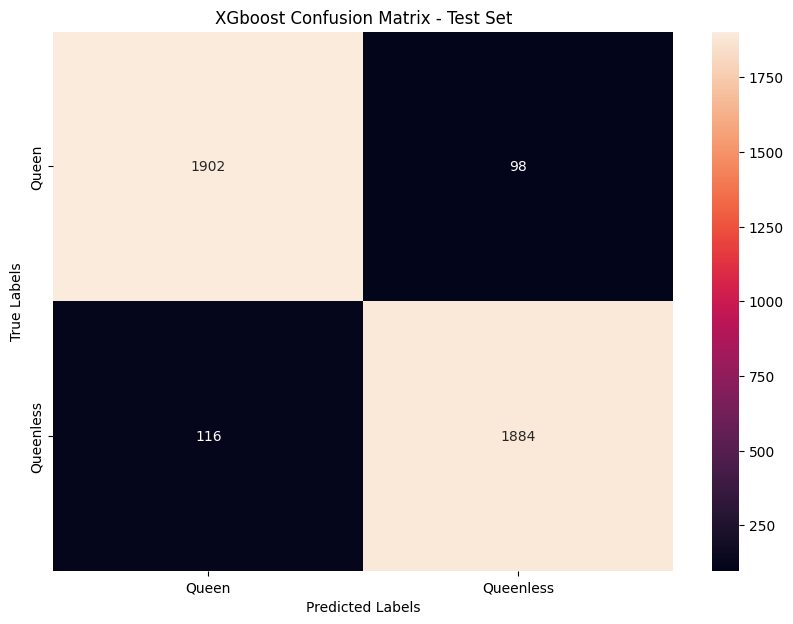

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = label_encoder.classes_
confusion_mat_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_test, annot=True, fmt="", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XGboost Confusion Matrix - Test Set')
plt.show()

In [11]:
import pickle

with open('40_mfccs_xgboost.pkl', 'wb') as f:
    pickle.dump(model, f)